In [2]:
import sys
sys.path.append('../')

In [4]:
from tabnet.estimator import TabNetClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
X, y = load_breast_cancer(return_X_y=True)

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [6]:
tabnet = TabNetClassifier(
    input_dims=30, output_dims=[1], logger=None, is_cuda=False,
    reprs_dims=8, atten_dims=4, num_steps=3, num_indep=1, num_shared=1
)

In [7]:
tabnet.build(path=None)

TabNetClassifier(atten_dims=4, batch_size=1024, cate_dims=None,
                 cate_embed_dims=1, cate_indices=None, criterions=None,
                 gamma=1.3, input_dims=30, is_cuda=False, is_shuffle=True,
                 logger=None, mask_type='sparsemax', momentum=0.03, num_indep=1,
                 num_shared=1, num_steps=3, num_workers=4, output_dims=[1],
                 pin_memory=True, reprs_dims=8, task_weights=1,
                 virtual_batch_size=128)

In [8]:
tabnet.show_model()

InferenceModel(
  (embedding_encoder): EmbeddingEncoder()
  (tabnet_encoder): TabNetEncoder(
    (input_bn): BatchNorm1d(30, eps=1e-05, momentum=0.03, affine=True, track_running_stats=True)
    (input_splitter): FeatureTransformer(
      (shared_block): FeatureBlock(
        (shared_layers): ModuleList(
          (0): Linear(in_features=30, out_features=24, bias=False)
        )
        (glu_blocks): ModuleList(
          (0): GLUBlock(
            (fc): Linear(in_features=30, out_features=24, bias=False)
            (gbn): GhostBatchNorm(
              (bn): BatchNorm1d(24, eps=1e-05, momentum=0.03, affine=True, track_running_stats=True)
            )
          )
        )
      )
      (indep_block): FeatureBlock(
        (glu_blocks): ModuleList(
          (0): GLUBlock(
            (fc): Linear(in_features=12, out_features=24, bias=False)
            (gbn): GhostBatchNorm(
              (bn): BatchNorm1d(24, eps=1e-05, momentum=0.03, affine=True, track_running_stats=True)
         

In [6]:
from torch.optim import Adam
from torch.optim import lr_scheduler


training_params = {
    'batch_size': 512,
    'max_epochs': 200,
    'metrics': ['acc'],
    'optimizer': Adam,
    'optimizer_params': {'lr': 0.2},
    'schedulers': [lr_scheduler.ExponentialLR],
    'scheduler_params': {'gamma': 0.99}
}


In [7]:
tabnet.fit(X, y.reshape(-1, 1), **training_params)

TabNetClassifier(atten_dims=4, batch_size=512, cate_dims=None,
                 cate_embed_dims=1, cate_indices=None, criterions=None,
                 gamma=1.3, input_dims=30, is_cuda=False, is_shuffle=True,
                 logger=None, mask_type='sparsemax', momentum=0.03, num_indep=1,
                 num_shared=1, num_steps=3, num_workers=4, output_dims=[1],
                 pin_memory=True, reprs_dims=8, task_weights=1,
                 virtual_batch_size=128)

In [8]:
importance, masks = tabnet.explain(X)

In [9]:
feature_names = [
    'mean radius',
     'mean texture',
     'mean perimeter',
     'mean area',
     'mean smoothness',
     'mean compactness',
     'mean concavity',
     'mean concave points',
     'mean symmetry',
     'mean fractal dimension',
     'radius error',
     'texture error',
     'perimeter error',
     'area error',
     'smoothness error',
     'compactness error',
     'concavity error',
     'concave points error',
     'symmetry error',
     'fractal dimension error',
     'worst radius',
     'worst texture',
     'worst perimeter',
     'worst area',
     'worst smoothness',
     'worst compactness',
     'worst concavity',
     'worst concave points',
     'worst symmetry',
     'worst fractal dimension'
]
len(feature_names)

30

In [11]:
import matplotlib.pyplot as plt

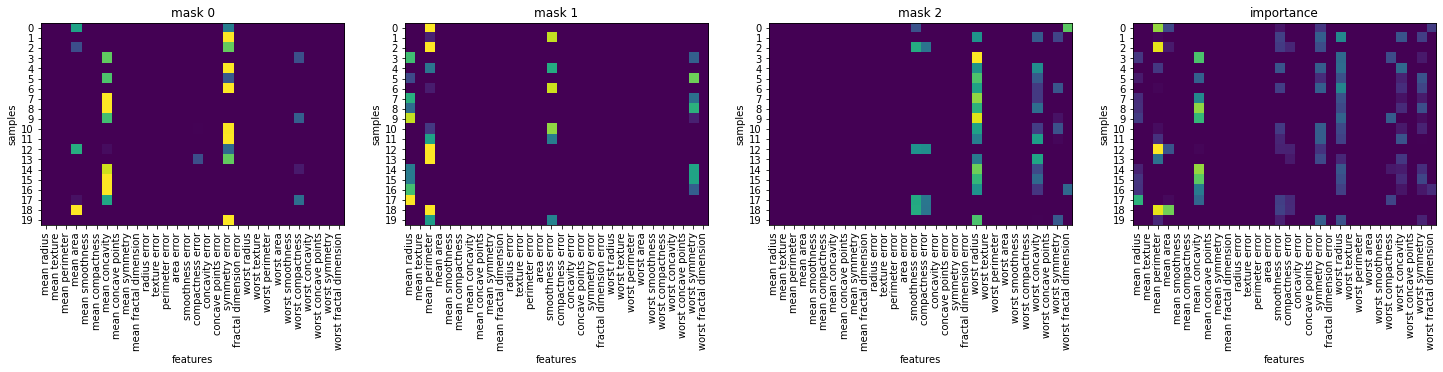

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(25,25))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:20])
    axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")
    axs[i].set_yticks(range(20))
    axs[i].set_xticks(range(30))
    axs[i].set_xticklabels(feature_names, rotation=90)

axs[3].imshow(importance.cpu().numpy()[:20, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')
axs[3].set_yticks(range(20))
axs[3].set_xticks(range(30))
axs[3].set_xticklabels(feature_names, rotation=90)
plt.show()

In [1]:
tabnet.show_model()

NameError: name 'tabnet' is not defined

In [16]:
X.shape

(569, 30)